### Computer Vision

## Computer Vision Libraries in Pytorch
* torchvision- Pytorch's Computer vision library.
* torchvision.datasets- get datasets and data loading functions for computer vision here 
* torchvision.models - get pretrained computer vision models that you can leveragae for your own problems
* torchvision.transforms - functions for manipulating your vision data to be suitable for used with an ML model.
* torch.utiles.data.Dataset- Base Data class for Pytorch.
* torch.utiles.data.DataLoader- creates a python iterable over an dataset

In [64]:
import torch 
from torch import nn 

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt 
print(torch.__version__)
print(torchvision.__version__)


2.1.2+cu118
0.16.2+cu118


### Getting a Dataset

##### Fashion MNIST Datset.

In [65]:
# Setup training data
train_data=datasets.FashionMNIST(root="data",train=True,transform=ToTensor(),target_transform=None,download=True)
test_data=datasets.FashionMNIST(root="data",train=False,transform=ToTensor(),target_transform=None,download=True)

In [66]:
len(train_data),len(test_data)

(60000, 10000)

In [67]:
### See the First Training Example
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [68]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [69]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [70]:
# Check the shape of our image 
print(image.shape,label)


torch.Size([1, 28, 28]) 9


### Visualizing our data

image_shape=>torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

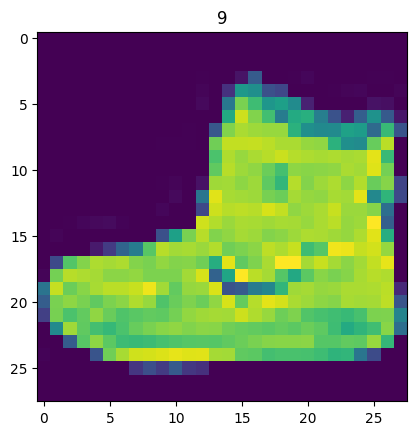

In [71]:
image,label=train_data[0]
print(f"image_shape=>{image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

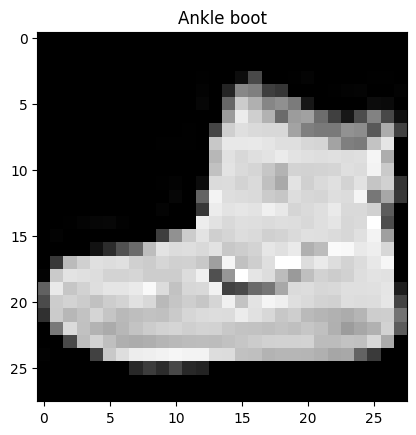

In [72]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label]);

In [73]:
# Plot more images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    print(random_idx)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


<Figure size 900x900 with 0 Axes>

In [74]:
train_data


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

## 2. Prepare DataLoader
Right now,our data is in the form of Pytorch datasets.DataLoader Turns our dataset into Python iterable.More Specifically,we want to turn our data into batches.


In [75]:
from torch.utils.data import DataLoader
## Setup the batch size hyperparameter
Batch_size=32

# Turn datasets into iterables
train_dataloader=DataLoader(dataset=train_data,batch_size=Batch_size,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=Batch_size,shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x18bcbce6290>,
 <torch.utils.data.dataloader.DataLoader at 0x18bc4bc02d0>)

In [76]:
# Let's checkout what we've created
print(f"DataLoaders:{train_dataloader,test_dataloader}")
print(f"Length of the DataLoader: {len(train_dataloader)}batches of {Batch_size}...")
print(f"Length of the Test_dataloader: {len(test_dataloader)}batches of {Batch_size}...")


DataLoaders:(<torch.utils.data.dataloader.DataLoader object at 0x0000018BCBCE6290>, <torch.utils.data.dataloader.DataLoader object at 0x0000018BC4BC02D0>)
Length of the DataLoader: 1875batches of 32...
Length of the Test_dataloader: 313batches of 32...


In [77]:
# Check out what's inside the training dataloader
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label:6,label size:torch.Size([])


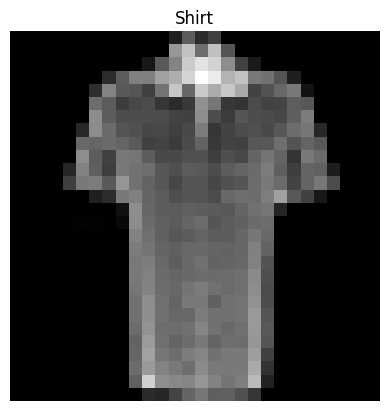

In [78]:
# Show a sample
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Label:{label},label size:{label.shape}")



### 3.Model 0 :Build a BaseLine model

In [79]:
# Create a flatten layer
flatten_model=nn.Flatten()
# Get a single frame
x=train_features_batch[0]
x.shape
# Flatten the sameple
output=flatten_model(x) # perform the forward pass 

#Printing out what happened:
print(f"Shape before Flattenning:{x.shape}")
print(f"Shape after flattening:{output.shape}")



Shape before Flattenning:torch.Size([1, 28, 28])
Shape after flattening:torch.Size([1, 784])


In [80]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [81]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape:int,hiddenunits:int,output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hiddenunits),
            nn.Linear(in_features=hiddenunits,out_features=output_shape)

        )

    def forward(self,x):
        return self.layer_stack(x)


In [82]:
torch.manual_seed(42)
# Setup model with input parameters
model_0=FashionMNISTModelV0(
   input_shape=28*28,
   hiddenunits=10,
   output_shape=len(class_names)
)

In [83]:
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [84]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [85]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss,optimizer and evaluation metrics

In [86]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc



In [87]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


### Creating a function to timeup our experiments.

In [88]:
from timeit import default_timer as timer  
def print_train_time(start:float,end:float,device:torch.device=None):
    """Prints Difference between start and end time"""
    total_time=end-start
    print(f"Total time on {device}:{total_time:.3f} seconds")
    return total_time


In [89]:
start_time=timer()
end_time=timer()
print_train_time(start=start_time,end=end_time,device="cpu")

Total time on cpu:0.000 seconds


2.8099981136620045e-05

In [90]:
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:06<00:13,  6.98s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:14<00:07,  7.10s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:21<00:00,  7.30s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Total time on cpu:21.916 seconds


In [91]:
device="cuda" if torch.cuda.is_available() else "cpu"

### Make Predictions and get Model 0 results

In [92]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn,device:torch.device=device):
    loss,acc=0,0 
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            y_pred=model(X)
            # Accumulate the loss and acc values per batch 
            loss+=loss_fn(y_pred,y)
            acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to fin the average loss/acc per batch 
        loss=loss/len(data_loader)
        acc/=len(data_loader)
    return {"model_name":model.__class__.__name__,"model_loss":loss.item(),"mode_acc":acc}

model_0_results=eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_0_results



100%|██████████| 313/313 [00:00<00:00, 322.66it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390025615692,
 'mode_acc': 83.42651757188499}

In [93]:
!nvidia-smi

Fri Feb  2 09:50:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.97                 Driver Version: 531.97       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650       WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8                3W /  N/A|    960MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [94]:
torch.cuda.is_available()

True

## Setting up device agnoistic code

In [95]:
import torch
device="cuda" if torch.cuda.is_available() else "cpu"

In [96]:
device

'cuda'

In [97]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU())
    def forward(self,x:torch.Tensor):
        return self.layer_stack(x)
        
        

In [98]:
torch.manual_seed(42)

In [99]:
model_1=FashionMNISTModelV2(input_shape=784,hidden_units=10,output_shape=len(class_names)).to(device)

In [100]:
model_1

FashionMNISTModelV2(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [101]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [102]:
## Creating a loss_fn,optimizer and evaluation metrics

In [103]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)


In [104]:
### Function for the training loop and testing loop.
def train_step(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim,accuracy_fn,device:torch.device=device):
    train_loss,train_acc=0,0
    for batch,(X,y) in enumerate(data_loader):
        model.train()
        X,y=X.to(device),y.to(device)
        y_pred=model(X)
        loss=loss_fn(y_pred,y)
        train_loss=train_loss+loss 
        train_acc=train_acc+accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss=train_loss/len(data_loader)
    train_acc=train_acc/len(data_loader)
    print(f"Train Loss: {train_loss:.5f} | Train_acc: {train_acc:.5f}")








In [105]:
def test_step(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn,device:torch.device=device):
    test_loss,test_acc=0,0 
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y=X.to(device),y.to(device)
            test_pred=model(X)
            test_loss+=loss_fn(test_pred,y)
            test_acc=test_acc+accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
        test_loss=test_loss/len(data_loader)
        test_acc=test_acc/len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test_acc: {test_acc:.4f}")



In [181]:
torch.manual_seed(42)
from timeit import default_timer as timer 
train_timer_start_on_gpu=timer()
epochs=3
for epoch in tqdm(range(epochs)):
    
    train_step(model=model_1,data_loader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn,device=device)
    test_step(model=model_1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)

train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_end_on_cpu,end=train_time_end_on_cpu,device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Train Loss: 0.64302 | Train_acc: 76.42833


 33%|███▎      | 1/3 [00:16<00:33, 16.67s/it]

Test loss: 0.68500 | Test_acc: 75.0200
Train Loss: 0.64302 | Train_acc: 76.42833


 67%|██████▋   | 2/3 [00:31<00:15, 15.37s/it]

Test loss: 0.68500 | Test_acc: 75.0200
Train Loss: 0.64302 | Train_acc: 76.42833


100%|██████████| 3/3 [00:46<00:00, 15.47s/it]

Test loss: 0.68500 | Test_acc: 75.0200
Total time on cuda:0.000 seconds


In [182]:
model_0=model_0.to(device)

In [183]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn,device:torch.device=device):
    loss,acc=0,0 
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X,y=X.to(device),y.to(device)
            y_pred=model(X)
            # Accumulate the loss and acc values per batch 
            loss+=loss_fn(y_pred,y)
            acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to fin the average loss/acc per batch 
        loss=loss/len(data_loader)
        acc/=len(data_loader)
    return {"model_name":model.__class__.__name__,"model_loss":loss.item(),"mode_acc":acc}

model_0_results=eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)



100%|██████████| 313/313 [00:01<00:00, 193.29it/s]


In [184]:
model_1_results=eval_model(model=model_1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)

100%|██████████| 313/313 [00:01<00:00, 191.61it/s]


In [185]:
model_1_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.6850008368492126,
 'mode_acc': 75.01996805111821}

In [186]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766389727592468,
 'mode_acc': 83.42651757188499}

### Building a Convolutional Neural Networks (CNN)


In [187]:
## Creating a Convolutional Neural Network   
class FashionMNISTModelV2(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),nn.MaxPool2d(kernel_size=2)
    )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*6*6,out_features=output_shape)
        )

    def forward(self,x):
        x=self.conv_block_1(x)
        #print(x.shape)
        x=self.conv_block_2(x)
        #print(x.shape)
        x=self.classifier(x)
        return x


        
    


In [188]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=len(class_names)).to(device)

In [189]:
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=360, out_features=10, bias=True)
  )
)

### Stepping through nn.Conv2d

In [190]:
torch.manual_seed(42)
images=torch.randn(size=(32,3,64,64))
test_images=images[0]
print(f"Images batch_Shape: {images.shape}")
print(f"Single Image Shape: {test_images.shape}")
print(f"Test image: \n {test_images}")




Images batch_Shape: torch.Size([32, 3, 64, 64])
Single Image Shape: torch.Size([3, 64, 64])
Test image: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[

In [191]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [192]:
### Create a singls Conv2d layer 
torch.manual_seed(42)
conv_layer=nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1,padding=0)

conv_output=conv_layer(test_images)

In [193]:
conv_output

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

### Stepping through nn.MaxPool2d()

In [194]:
print(f"Test image original shape :{test_images.shape}")
print(f"Test image with unsqueezed dimension: {test_images.unsqueeze(0).shape}")

max_pool_layer=nn.MaxPool2d(kernel_size=2)
test_image_through_conv=conv_layer(test_images.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
print(f"Size after going through conv and max_pool_layer(): {test_image_through_conv_and_max_pool.shape} ")



Test image original shape :torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Size after going through conv and max_pool_layer(): torch.Size([1, 10, 31, 31]) 


In [195]:
torch.manual_seed(42)
random_tensor=torch.rand(size=[1,28,28])
print(random_tensor)
maxpool=nn.MaxPool2d(kernel_size=2)
max_pool_tensor=max_pool_layer(random_tensor)
print(f"\n Max pool tensor:{max_pool_tensor}")
print(f"\n MaxpoolTensor shape:{max_pool_tensor.shape}")


tensor([[[0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566, 0.7936,
          0.9408, 0.1332, 0.9346, 0.5936, 0.8694, 0.5677, 0.7411, 0.4294,
          0.8854, 0.5739, 0.2666, 0.6274, 0.2696, 0.4414, 0.2969, 0.8317,
          0.1053, 0.2695, 0.3588, 0.1994],
         [0.5472, 0.0062, 0.9516, 0.0753, 0.8860, 0.5832, 0.3376, 0.8090,
          0.5779, 0.9040, 0.5547, 0.3423, 0.6343, 0.3644, 0.7104, 0.9464,
          0.7890, 0.2814, 0.7886, 0.5895, 0.7539, 0.1952, 0.0050, 0.3068,
          0.1165, 0.9103, 0.6440, 0.7071],
         [0.6581, 0.4913, 0.8913, 0.1447, 0.5315, 0.1587, 0.6542, 0.3278,
          0.6532, 0.3958, 0.9147, 0.2036, 0.2018, 0.2018, 0.9497, 0.6666,
          0.9811, 0.0874, 0.0041, 0.1088, 0.1637, 0.7025, 0.6790, 0.9155,
          0.2418, 0.1591, 0.7653, 0.2979],
         [0.8035, 0.3813, 0.7860, 0.1115, 0.2477, 0.6524, 0.6057, 0.3725,
          0.7980, 0.8399, 0.1374, 0.2331, 0.9578, 0.3313, 0.3227, 0.0162,
          0.2137, 0.6249, 0.4340, 0.1371, 0.5117, 0.1585,

In [196]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

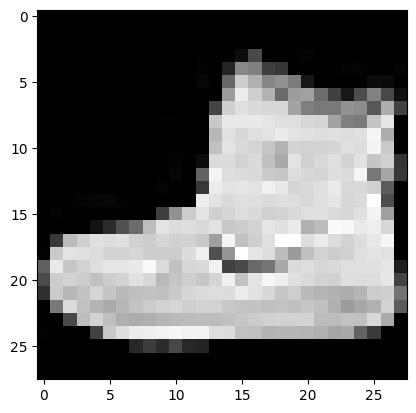

In [197]:
plt.imshow(image.squeeze(),cmap="gray")

In [198]:
torch.manual_seed(42)
model=FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=len(class_names)).to(device)


In [199]:
model_2(random_tensor.unsqueeze(0).to(device))

tensor([[-0.0443,  0.0370, -0.0060,  0.0162, -0.0116,  0.0739,  0.0956, -0.0413,
         -0.0260, -0.0555]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Setting up a loss function and an optimizer

In [200]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

### Training and testing model_2 using training and test functions.



In [201]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time 
from timeit import default_timer as timer 
train_time_start_model_2=timer()
epoch=3 
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    train_step(model=model_2,data_loader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn,device=device)
    test_step(model=model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)

train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2,end=train_time_end_model_2)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train Loss: 0.62621 | Train_acc: 77.07333


 33%|███▎      | 1/3 [00:16<00:33, 16.57s/it]

Test loss: 0.42384 | Test_acc: 84.9840
Epoch: 1
Train Loss: 0.37585 | Train_acc: 86.34333


 67%|██████▋   | 2/3 [00:32<00:16, 16.43s/it]

Test loss: 0.36840 | Test_acc: 86.5815
Epoch: 2
Train Loss: 0.34026 | Train_acc: 87.72833


100%|██████████| 3/3 [00:49<00:00, 16.58s/it]

Test loss: 0.33762 | Test_acc: 87.8894
Total time on None:49.731 seconds


In [202]:
# Get model-2 results
model_2_results=eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

100%|██████████| 313/313 [00:02<00:00, 152.56it/s]


In [203]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33761945366859436,
 'mode_acc': 87.88937699680511}

In [204]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766389727592468,
 'mode_acc': 83.42651757188499}

## Compare model results and training time

In [206]:
import pandas as pd 
compare_results=pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare_results

,model_name,model_loss,mode_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV2,0.685001,75.019968
2,FashionMNISTModelV2,0.337619,87.889377


In [207]:
compare_results["training_time"]=[total_train_time_model_0,total_train_time_model_1,total_train_time_model_2]

In [208]:
compare_results

,model_name,model_loss,mode_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,21.915812
1,FashionMNISTModelV2,0.685001,75.019968,0.000000
2,FashionMNISTModelV2,0.337619,87.889377,49.731240


### Visualizing the model_results

Text(0, 0.5, 'model')

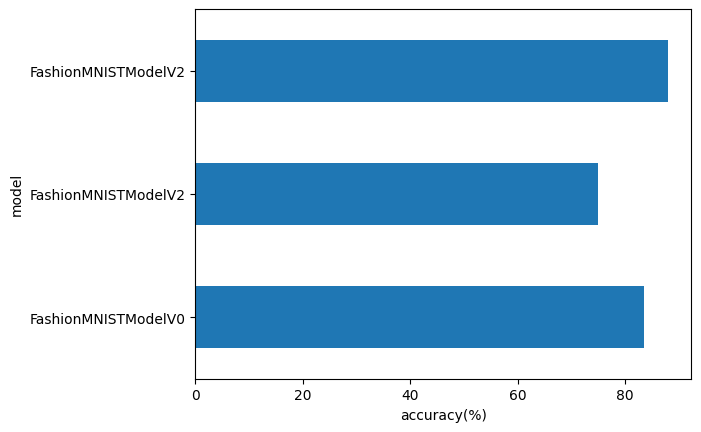

In [210]:
compare_results.set_index("model_name")["mode_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

### Make and evaluate random predictions with best model

In [220]:
def make_predictions(model:torch.nn.Module,data:list,device:torch.device=device):
    pred_probs=[]
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample 
            sample=torch.unsqueeze(sample,dim=0).to(device)

            # Forward pass(model outputs raw logits)
            pred_logit=model(sample)

            # Get prediction probability(logit-> predictions)
            pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)

            # Get pred_prob off the GPU for further calculations 
            pred_probs.append(pred_prob.cpu())

# Stack the pred_probs to turn list into a tensor 
    return torch.stack(pred_probs)





In [212]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [213]:
import random 
random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape 
test_samples[0].shape 


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

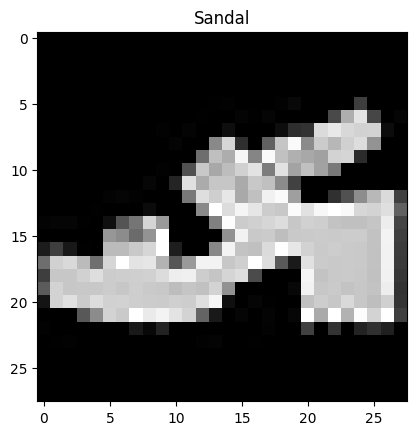

In [221]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [223]:
pred_probs=make_predictions(model=model_2,data=test_samples)

# View the first two predictions.
pred_probs[:2]

tensor([[6.2585e-08, 8.5202e-09, 2.1647e-08, 9.2899e-08, 2.2858e-08, 9.9999e-01,
         3.1928e-08, 7.7157e-07, 9.6454e-07, 1.1628e-05],
        [7.0460e-02, 4.4305e-01, 2.5336e-04, 4.3891e-01, 1.3271e-02, 7.6924e-05,
         3.1421e-02, 1.4384e-04, 2.2817e-03, 1.3115e-04]])

In [224]:
test_labels[:10]

[5, 1, 7, 4, 3, 0, 4, 7, 1]

### Convert Prediction Probabilities into labels

In [225]:
pred_probs_labels=pred_probs.argmax(dim=1)
pred_probs_labels

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

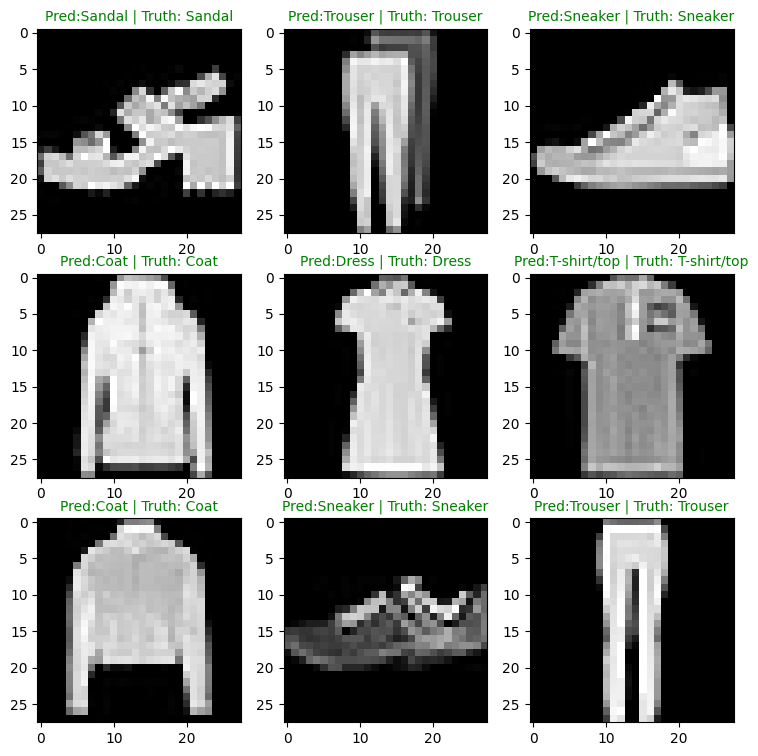

In [226]:
plt.figure(figsize=(9,9))
nrows=3 
ncols=3 
for i,sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(sample.squeeze(),cmap="gray")

    # Find the Prediction( int text form e.g "Sanda")
    pred_label=class_names[pred_probs_labels[i]]
    
    truth_label=class_names[test_labels[i]]

    title_text=f"Pred:{pred_label} | Truth: {truth_label}"

    if pred_label==truth_label:
        plt.title(title_text,fontsize=10,c="g")

    else:
        plt.title(title_text,fontsize=10,c="r")